In [1]:
# Import the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, shape, MultiPolygon, Polygon
from geopandas import GeoDataFrame
import json
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import ast

In [2]:
# Load in the dataframe.
pd.set_option('display.max_columns', None)
df = pd.read_csv('Homicides - 4326.csv')
df.head()

,_id,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOW,OCC_DOY,DIVISION,HOMICIDE_TYPE,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,geometry
0,1,GO-2004111878,1073106000000,2004,January,3,Saturday,3,D53,Other,98,Rosedale-Moore Park,98,Rosedale-Moore Park (98),"{'type': 'MultiPoint', 'coordinates': [[-79.39..."
1,2,GO-2004125755,1073538000000,2004,January,8,Thursday,8,D42,Shooting,142,Woburn North,137,Woburn (137),"{'type': 'MultiPoint', 'coordinates': [[-79.23..."
2,3,GO-2004136086,1073538000000,2004,January,8,Thursday,8,D42,Shooting,146,Malvern East,132,Malvern (132),"{'type': 'MultiPoint', 'coordinates': [[-79.20..."
3,4,GO-2004148623,1075006800000,2004,January,25,Sunday,25,D13,Shooting,171,Junction-Wallace Emerson,93,Dovercourt-Wallace Emerson-Junction (93),"{'type': 'MultiPoint', 'coordinates': [[-79.43..."
4,5,GO-2004148619,1075006800000,2004,January,25,Sunday,25,D42,Shooting,144,Morningside Heights,131,Rouge (131),"{'type': 'MultiPoint', 'coordinates': [[-79.20..."


In [3]:
# Include only data for the year 2016 and onward.
filtered_df =df[df['OCC_YEAR'] >= 2016]

# Display the first few rows of the filtered data.
filtered_df.head()

,_id,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOW,OCC_DOY,DIVISION,HOMICIDE_TYPE,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,geometry
779,780,GO-201620700,1451883600000,2016,January,4,Monday,4,D54,Shooting,61,Taylor-Massey,61,Taylor-Massey (61),"{'type': 'MultiPoint', 'coordinates': [[-79.29..."
780,781,GO-201698593,1453006800000,2016,January,17,Sunday,17,D32,Other,50,Newtonbrook East,50,Newtonbrook East (50),"{'type': 'MultiPoint', 'coordinates': [[-79.41..."
781,782,GO-2016108786,1453179600000,2016,January,19,Tuesday,19,D22,Shooting,18,New Toronto,18,New Toronto (18),"{'type': 'MultiPoint', 'coordinates': [[-79.50..."
782,783,GO-2016119350,1453266000000,2016,January,20,Wednesday,20,D22,Shooting,10,Princess-Rosethorn,10,Princess-Rosethorn (10),"{'type': 'MultiPoint', 'coordinates': [[-79.54..."
783,784,GO-2016120610,1453266000000,2016,January,20,Wednesday,20,D42,Shooting,147,L'Amoreaux West,117,L'Amoreaux (117),"{'type': 'MultiPoint', 'coordinates': [[-79.33..."


In [4]:
# Display all the null values.
filtered_df.isnull().sum()

_id                  0
EVENT_UNIQUE_ID      0
OCC_DATE             0
OCC_YEAR             0
OCC_MONTH            0
OCC_DAY              0
OCC_DOW              0
OCC_DOY              0
DIVISION             0
HOMICIDE_TYPE        0
HOOD_158             0
NEIGHBOURHOOD_158    0
HOOD_140             0
NEIGHBOURHOOD_140    0
geometry             0
dtype: int64

In [5]:
# Count the HOMICIDE_TYPE column.
filtered_df['HOMICIDE_TYPE'].value_counts()

HOMICIDE_TYPE
Shooting    342
Other       158
Stabbing    135
Name: count, dtype: int64

In [6]:
# Extract latitude and longitude from the geometry column.
filtered_df['Latitude'] = filtered_df['geometry'].apply(lambda x: ast.literal_eval(x)['coordinates'][0][1])
filtered_df['Longitude'] = filtered_df['geometry'].apply(lambda x: ast.literal_eval(x)['coordinates'][0][0])

# Convert to GeoDataFrame.
gdf = gpd.GeoDataFrame(
    filtered_df,
    geometry=gpd.points_from_xy(filtered_df.Longitude, filtered_df.Latitude),
    crs="EPSG:4326"
)

# Display the first few rows of the GeoDataFrame.
gdf.head()

/var/folders/pf/dhzh4m9j6tq7w7_1qw2v6c580000gn/T/ipykernel_15123/45938412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Latitude'] = filtered_df['geometry'].apply(lambda x: ast.literal_eval(x)['coordinates'][0][1])
/var/folders/pf/dhzh4m9j6tq7w7_1qw2v6c580000gn/T/ipykernel_15123/45938412.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Longitude'] = filtered_df['geometry'].apply(lambda x: ast.literal_eval(x)['coordinates'][0][0])


,_id,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOW,OCC_DOY,DIVISION,HOMICIDE_TYPE,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,geometry,Latitude,Longitude
779,780,GO-201620700,1451883600000,2016,January,4,Monday,4,D54,Shooting,61,Taylor-Massey,61,Taylor-Massey (61),POINT (-79.29128 43.69314),43.693142,-79.291282
780,781,GO-201698593,1453006800000,2016,January,17,Sunday,17,D32,Other,50,Newtonbrook East,50,Newtonbrook East (50),POINT (-79.41047 43.79654),43.796542,-79.410473
781,782,GO-2016108786,1453179600000,2016,January,19,Tuesday,19,D22,Shooting,18,New Toronto,18,New Toronto (18),POINT (-79.50862 43.60001),43.600013,-79.508621
782,783,GO-2016119350,1453266000000,2016,January,20,Wednesday,20,D22,Shooting,10,Princess-Rosethorn,10,Princess-Rosethorn (10),POINT (-79.54346 43.67201),43.672011,-79.543465
783,784,GO-2016120610,1453266000000,2016,January,20,Wednesday,20,D42,Shooting,147,L'Amoreaux West,117,L'Amoreaux (117),POINT (-79.33362 43.79805),43.798048,-79.333616


In [7]:
# Load the Police Boundaries file.
police_boundaries = gpd.read_file('Police Boundaries Data.geojson')

In [8]:
# Perform a spatial join to merge the incident points with the run areas.
gdf = gpd.sjoin(gdf, police_boundaries, how='left', op='within')

/opt/miniconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [15]:
# Filter the GeoDataFrame into 3 for stabbings, shootings, and other.
stabbings_gdf = gdf[gdf['HOMICIDE_TYPE'] == 'Stabbing']

/var/folders/pf/dhzh4m9j6tq7w7_1qw2v6c580000gn/T/ipykernel_15123/1019710442.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


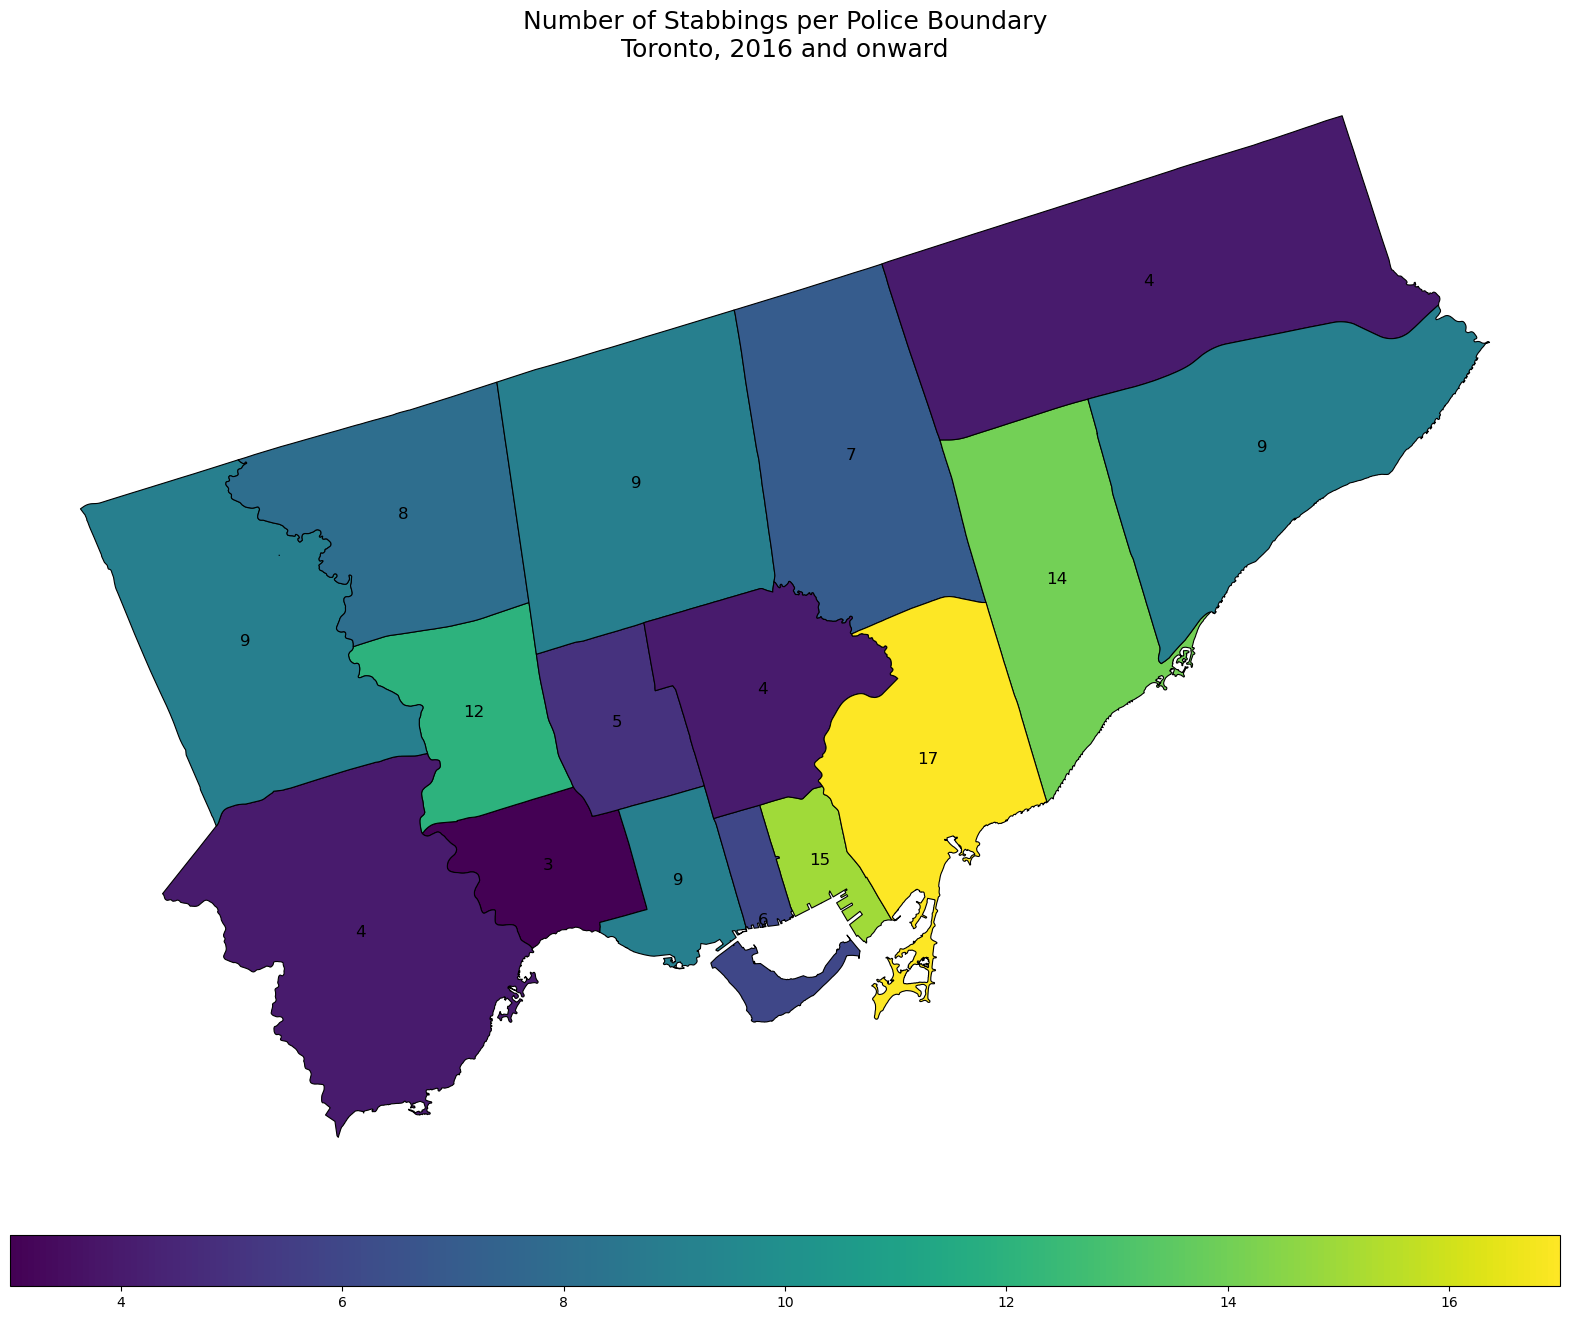

In [10]:
# Group by police boundary and count the number of stabbings.
stabbings_count = stabbings_gdf.groupby('DIV').size().reset_index(name='stabbings_count')

# Merge the count with the police boundaries GeoDataFrame.
police_boundaries = police_boundaries.merge(stabbings_count, on='DIV', how='left')

# Fill NaN values with 0 (for boundaries with no stabbings).
police_boundaries['stabbings_count'] = police_boundaries['stabbings_count'].fillna(0)

# Plot the heatmap.
fig, ax = plt.subplots(figsize=(20, 20))
norm = Normalize(vmin=police_boundaries['stabbings_count'].min(), vmax=police_boundaries['stabbings_count'].max())
cmap = cm.get_cmap('viridis')

# Plotting the police boundaries with stabbings count.
police_boundaries.plot(ax=ax, column='stabbings_count', cmap='viridis', linewidth=0.8, edgecolor='k', legend=False, norm=norm)

# Adding the color bar.
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.03, aspect=30)
cbar.ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0f}'))

# Adding the number of stabbings to the center of each polygon.
for idx, row in police_boundaries.iterrows():
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y, int(row['stabbings_count']),
             horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')

# Final touches.
ax.set_title('Number of Stabbings per Police Boundary\nToronto, 2016 and onward', fontsize=18)
ax.set_axis_off()
plt.show()